In [1]:
import pandas as pd


In [4]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
enc = LabelEncoder()

In [7]:
data['gender'] = enc.fit_transform(data['gender'].values)
data['hypertension'] = enc.fit_transform(data['hypertension'].values)
data['heart_disease'] = enc.fit_transform(data['heart_disease'].values)
data['ever_married'] = enc.fit_transform(data['ever_married'].values)
data['work_type'] = enc.fit_transform(data['work_type'].values)
data['Residence_type'] = enc.fit_transform(data['Residence_type'].values)
data['smoking_status'] = enc.fit_transform(data['smoking_status'].values)
data['bmi'] = enc.fit_transform(data['bmi'].values)

In [8]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,239,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,418,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,198,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,217,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,113,2,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   int64  
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 479.2 KB


In [10]:
atr_data = data.drop(columns='stroke')
atr_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,1,67.0,0,1,1,2,1,228.69,239,1
1,51676,0,61.0,0,0,1,3,0,202.21,418,2
2,31112,1,80.0,0,1,1,2,0,105.92,198,2
3,60182,0,49.0,0,0,1,2,1,171.23,217,3
4,1665,0,79.0,1,0,1,3,0,174.12,113,2


In [11]:
cls_data = data['stroke']
cls_data.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(atr_data,cls_data,test_size=0.2,random_state=500)
tree_data = DecisionTreeClassifier(random_state=500)
tree_data.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=500)

In [14]:
print('Nilai akurasi pada data testing adalah: ',tree_data.score(xtest,ytest))

Nilai akurasi pada data testing adalah:  0.9050880626223092


In [15]:
from sklearn.tree import export_graphviz
export_graphviz(tree_data,out_file="tree_stroke.dot",class_names=["1","0"],
                feature_names=atr_data.columns,impurity=False,filled=True)

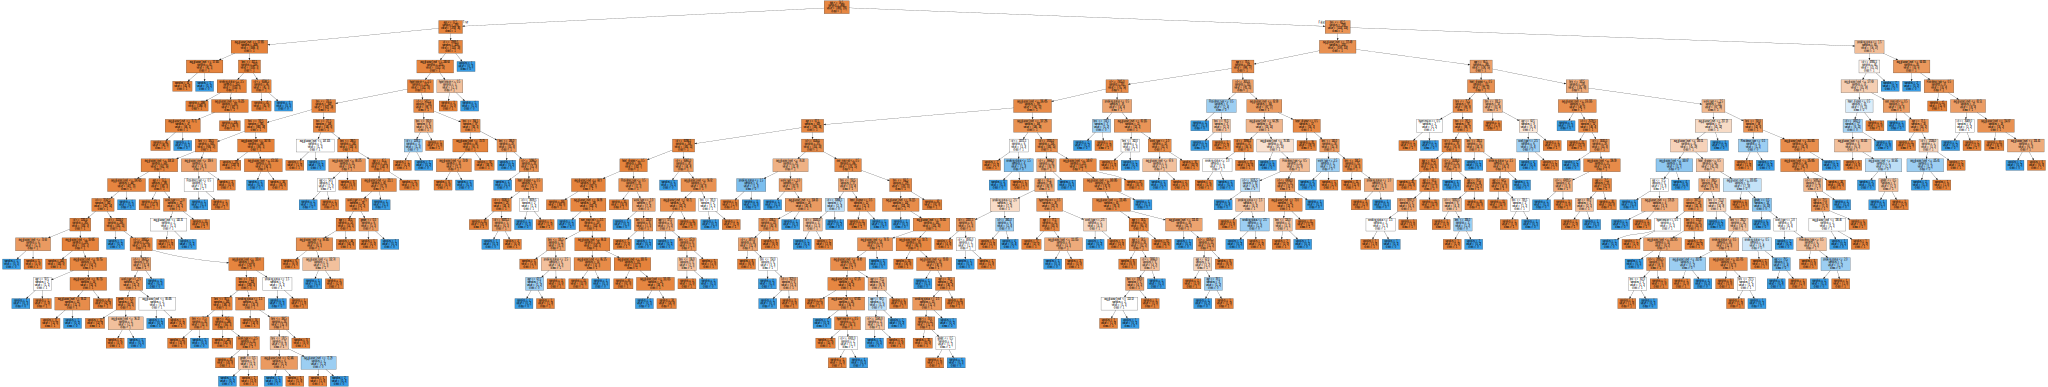

In [16]:
import graphviz
with open("tree_stroke.dot") as fig:
    dot_graph = fig.read()
graphviz.Source(dot_graph)